In [1]:
# Python Library
import os, glob, sys
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
import numpy as np
from astropy.table import Table, vstack
import warnings
warnings.filterwarnings("ignore")

# Plot presetting
import matplotlib.pyplot as plt
import matplotlib as mpl
#
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 500
plt.rc('font', family='serif')

In [2]:
path_data = f"/large_data/factory/7dt01/2024-04-22_TEST_gain2750"

In [4]:
snapshots = sorted(glob.glob(f"{path_data}/*subt*sub*fits"))
print(f"{len(snapshots)} snapshots")

65 snapshots


In [9]:
sntbl = Table()
sntbl["snapshot"] = snapshots
sntbl['n_zero'] = 0
sntbl['frac_zero'] = 0.
sntbl['n_zero_center'] = 0
sntbl['frac_zero_center'] = 0.

In [12]:
size = 5

for ii, inim in enumerate(snapshots):
	data = fits.getdata(inim)
	#	Size
	y, x = data.shape
	y_center, x_center = int(y/2), int(x/2)
	data_sub = data[y_center-size:y_center+size,x_center-size:x_center+size]
	#	Total number
	n_total = y*x
	n_sub_total = (size*2)**2

	#	Statistics
	n_zero = len(data[data == 0])
	frac_zero = n_zero / n_total

	n_zero_center = len(data_sub[data_sub == 0])
	frac_zero_center = n_zero_center / n_sub_total 

	#	Save results
	sntbl['n_zero'][ii] = n_zero
	sntbl['frac_zero'][ii] = frac_zero
	sntbl['n_zero_center'][ii] = n_zero_center
	sntbl['frac_zero_center'][ii] = frac_zero_center

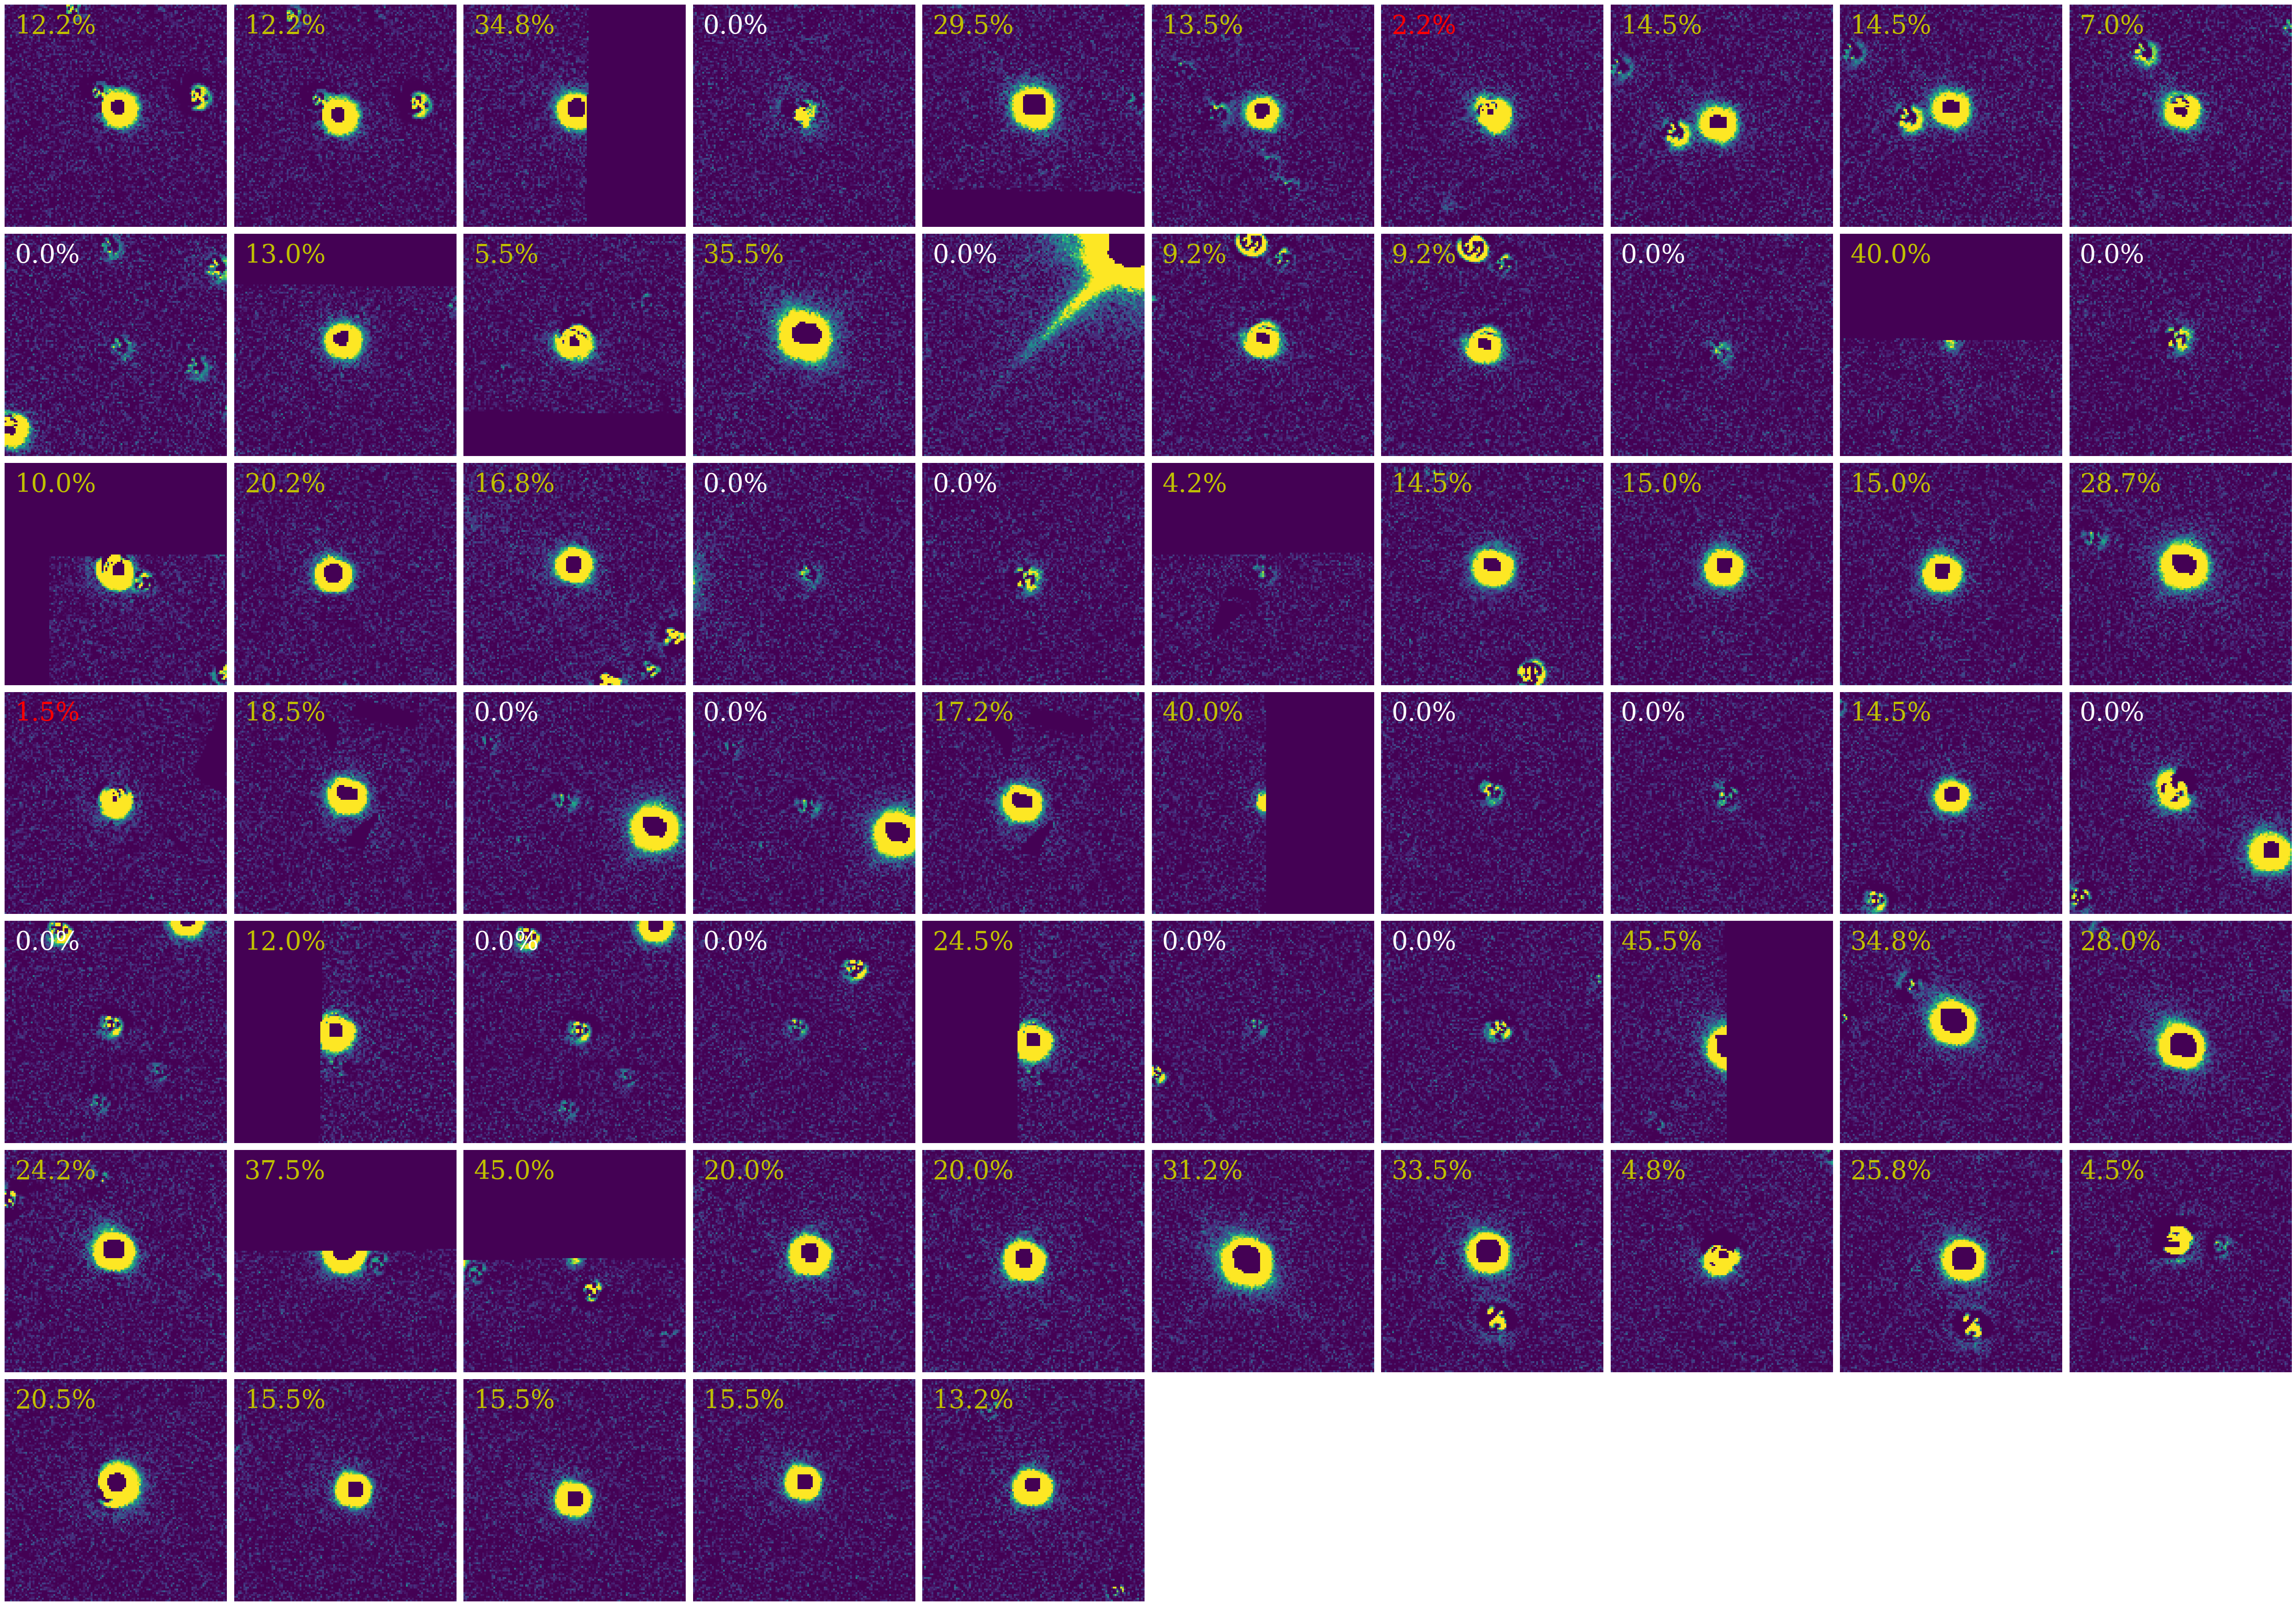

In [41]:
n_images = len(snapshots)
cols = 10  # 한 줄에 표시할 이미지 수
rows = (n_images + cols - 1) // cols  # 필요한 줄 수 계산

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  # 다루기 쉽게 축 배열을 1D로 변환

for ii, ax in enumerate(axes):
	if ii < n_images:
		inim = snapshots[ii]
		data = fits.getdata(inim)
		y, x = data.shape
		y_center, x_center = int(y/2), int(x/2)
		size = 10  # size가 정의되어 있지 않았으므로 적당한 값을 선택하였습니다.
		data_sub = data[y_center-size:y_center+size, x_center-size:x_center+size]

		n_total = y * x
		n_sub_total = (size * 2) ** 2

		n_zero = len(data[data == 0])
		frac_zero = n_zero / n_total

		n_zero_center = len(data_sub[data_sub == 0])
		frac_zero_center = n_zero_center / n_sub_total

		ax.imshow(data, vmin=0, vmax=5)
		# ax.set_title(f"value={frac_zero_center:.1%}")
		if frac_zero_center == 0:
			color = 'w'
		elif frac_zero_center > 0.04:
			color = 'y'
		else:
			color = 'r'
		ax.text(5, 15, f"{frac_zero_center:.1%}", size=40, color=color)
		ax.axis('off')  # 축을 보이지 않게 설정
	else:
		ax.axis('off')  # 빈 subplot의 축도 보이지 않게 설정

plt.tight_layout()  # 레이아웃 조정
plt.show()

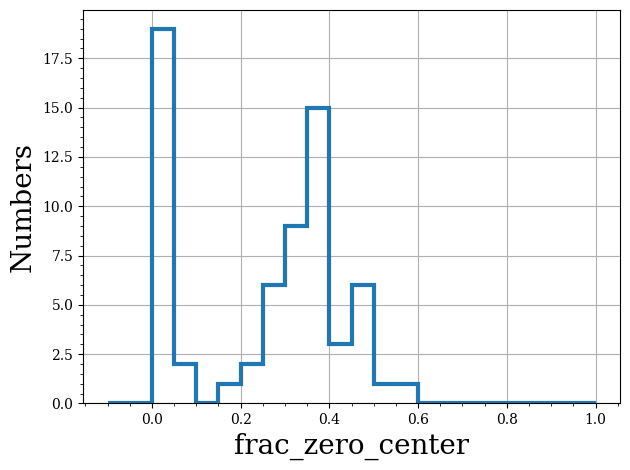

In [36]:
bins = np.arange(-0.1, 1.0+0.05, 0.05)
plt.hist(sntbl['frac_zero_center'], bins=bins, histtype='step', lw=3)
plt.xlabel("frac_zero_center")
plt.ylabel("Numbers")
plt.grid('both')
plt.minorticks_on()
plt.tight_layout()